In [14]:
import scanpy as sc
import infercnvpy as cnv

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
adata = cnv.datasets.oligodendroglioma()
sc.pp.log1p(adata)

In [17]:
cnv.tl.infercnv(
    adata,
    reference_key="cell_type",
    reference_cat=["Oligodendrocytes (non-malignant)", "Microglia/Macrophage"],
    window_size=101,
    step=1,
    n_jobs=1,
)

  0%|          | 0/1 [00:00<?, ?it/s]

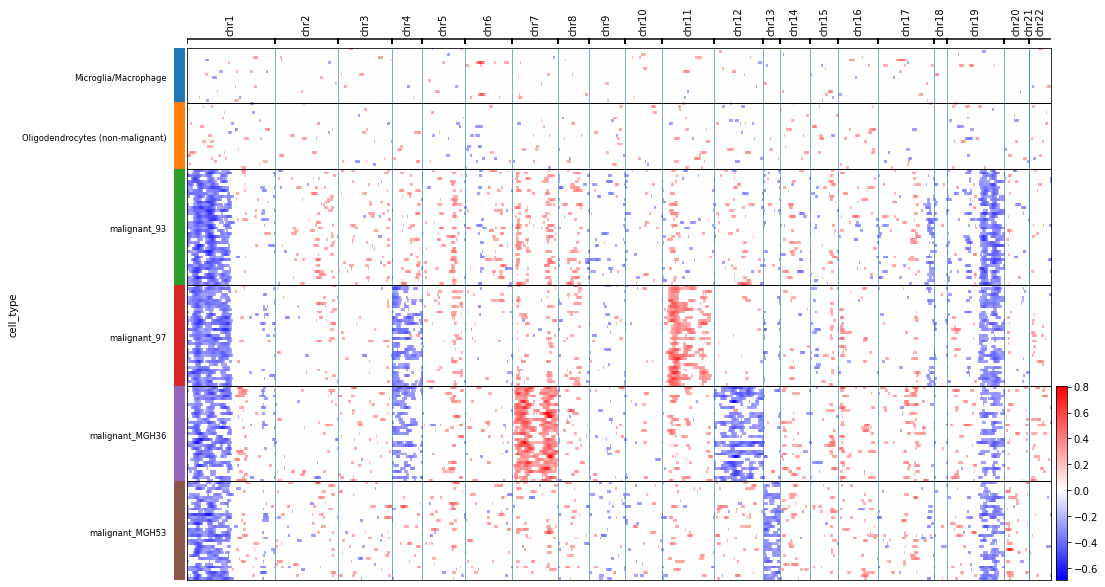

In [18]:
cnv.pl.chromosome_heatmap(adata, use_rep='cnv', groupby="cell_type")

In [19]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

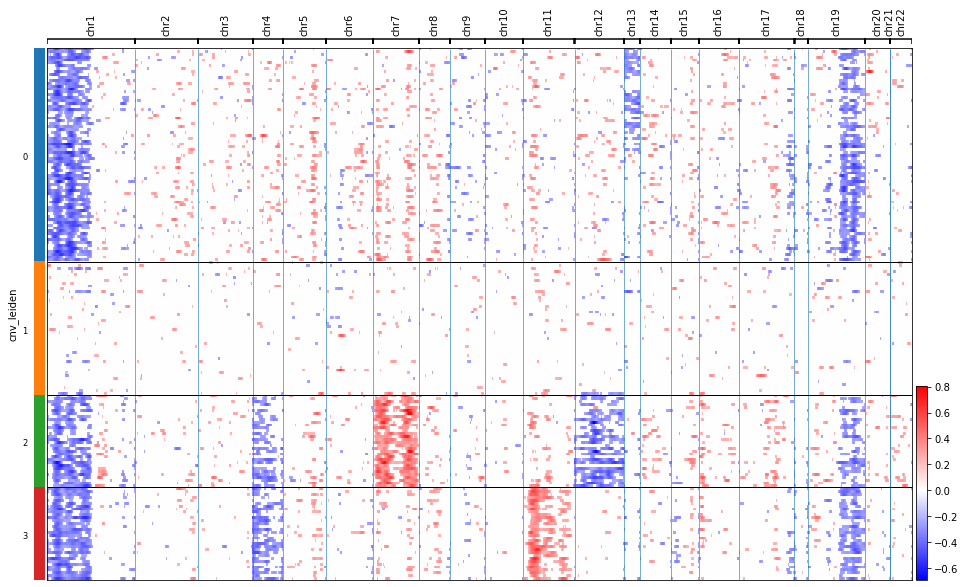

In [20]:
cnv.pl.chromosome_heatmap(adata, use_rep='cnv', groupby="cnv_leiden")

In [29]:
cnv.tl.hmm_denoising(
    adata=adata,
    reference_key='cell_type',
    reference_cat=["Oligodendrocytes (non-malignant)", "Microglia/Macrophage"],
    subclone_key='cnv_leiden',
    key_used = 'cnv',
    key_added = 'hmm',
    iterations=6
)

(True,
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]], dtype=int32),
 {'0': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 720 stored elements in Compressed Sparse Row format>,
  '1': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  '2': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 1879 stored elements in Compressed Sparse Row format>,
  '3': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 1327 stored elements in Compressed Sparse Row format>})

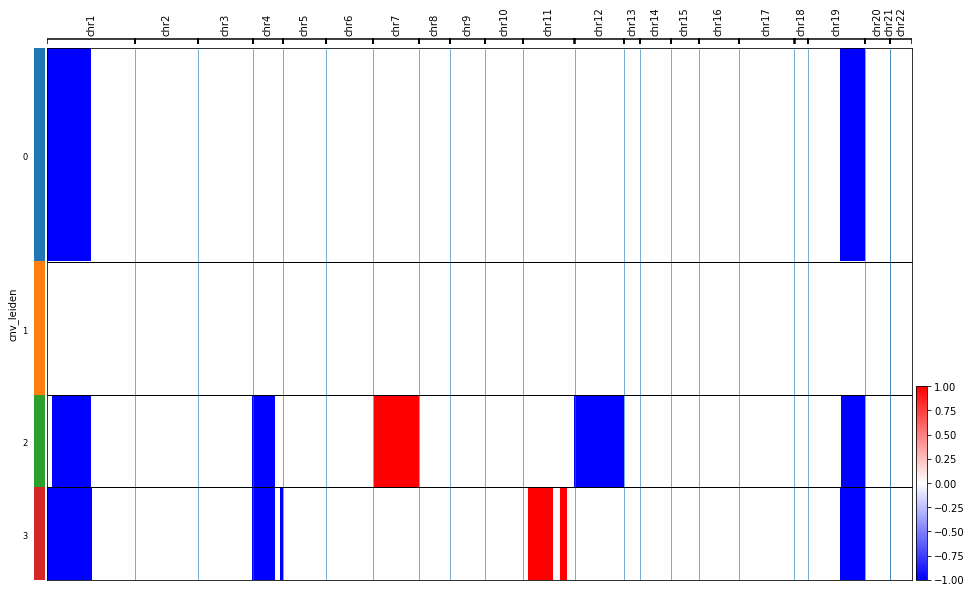

In [30]:
cnv.pl.chromosome_heatmap(adata, use_rep='hmm', groupby="cnv_leiden")